In [11]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor

In [13]:
df = pd.read_csv('../../datasets/Conventional.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,117454,429518,5554
1,2015-01-11,110974,427723,5358
2,2015-01-18,151977,500684,4225
3,2015-01-25,140914,422435,4945
4,2015-02-01,217716,608156,5736


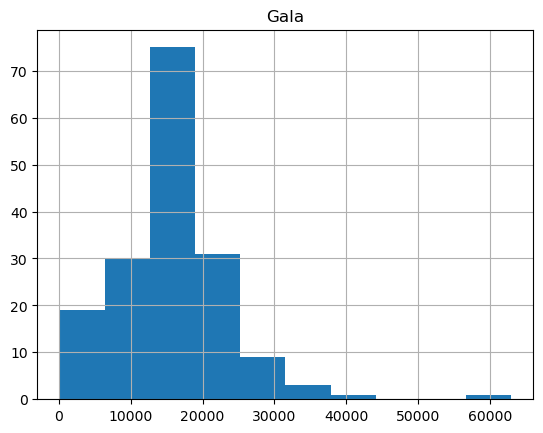

In [14]:
data = df[['Gala']]
data.hist();

In [15]:
seq_df = window_input_output(14, 14, data)
seq_df

,Gala,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,22068,19547.0,18450.0,12854.0,17694.0,17507.0,18725.0,18818.0,17378.0,16724.0,...,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0,5358.0,5554.0
28,17089,22068.0,19547.0,18450.0,12854.0,17694.0,17507.0,18725.0,18818.0,17378.0,...,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0,5358.0
29,25778,17089.0,22068.0,19547.0,18450.0,12854.0,17694.0,17507.0,18725.0,18818.0,...,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0,4225.0
30,16711,25778.0,17089.0,22068.0,19547.0,18450.0,12854.0,17694.0,17507.0,18725.0,...,4760.0,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0,4945.0
31,24026,16711.0,25778.0,17089.0,22068.0,19547.0,18450.0,12854.0,17694.0,17507.0,...,6309.0,4760.0,8461.0,5122.0,7265.0,5507.0,5686.0,7798.0,5421.0,5736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,14153,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,8951.0,11714.0,...,6360.0,711.0,178.0,198.0,192.0,2422.0,12806.0,13836.0,10440.0,13425.0
165,15527,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,8951.0,...,10872.0,6360.0,711.0,178.0,198.0,192.0,2422.0,12806.0,13836.0,10440.0
166,16599,15527.0,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,14102.0,...,8618.0,10872.0,6360.0,711.0,178.0,198.0,192.0,2422.0,12806.0,13836.0
167,15484,16599.0,15527.0,14153.0,12930.0,13754.0,11698.0,9804.0,14834.0,11964.0,...,8942.0,8618.0,10872.0,6360.0,711.0,178.0,198.0,192.0,2422.0,12806.0


## Split data

In [16]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Gala')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [17]:
model = MultiOutputRegressor(OneVsRestClassifier(SVR(kernel='rbf')))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Gala):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Gala):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Gala): 83182636.62315272
Mean Absolute Error (Gala): 7293.72660098522
R-squared (Test score) -0.4551962853908554
Train score 1.0


## Visualization

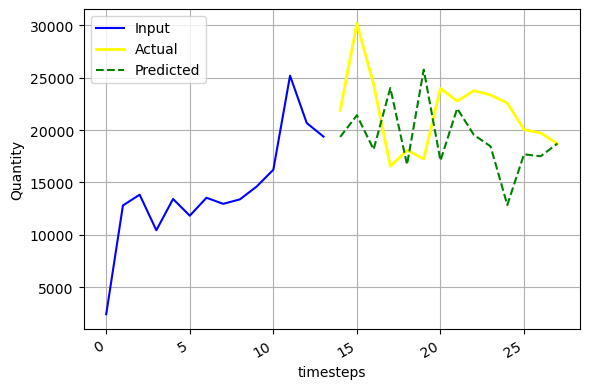

In [19]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()